In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

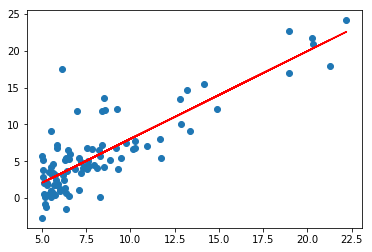

Slope is 1.1930336441895935
Y intercept is -3.8957808783118555


In [2]:
#df = pd.read_csv('C:/Users/JERAZO/Documents/ex1data1.txt', header=None, names=['x','y']) # for windows
df = pd.read_csv('/home/jose/MLCourse/datasets/ex1data1.txt', header=None, names=['x','y']) # for ubuntu

x = df.iloc[:, 0].values.reshape(97, 1)  # values converts it into a numpy array
y = df.iloc[:, 1].values.reshape(97, 1) 
theta = np.zeros((2, 1))

vector_x = x.reshape(1, 97)
vector_y = y.reshape(1, 97)

linear_regressor = LinearRegression()
linear_regressor.fit(x, y)
Y_predict = linear_regressor.predict(x)
plt.scatter(x, y)
plt.plot(x, Y_predict, color='red')
plt.show()

x = np.array(df.x)
y = np.array(df.y)

#linear regression implementation using libraries

(m,b) = np.polyfit(x,y,1)
print('Slope is ' + str(m))
print('Y intercept is ' + str(b))

yp = np.polyval([m,b],x)

# Ahora usaremos el escalamiento de características con y sin normalización media:

# 1 - Sin normalización media, con xi = xi/max

In [3]:
# sin normalización media

vector_x = x.reshape(1, 97)
vector_y = y.reshape(1, 97)

max_vector_x = vector_x.max()
max_vector_y = vector_y.max()

sf_vector_x = vector_x / max_vector_x
sf_vector_y = vector_y / max_vector_y

In [4]:
theta = np.zeros((2, 1))
iterators = 5000
alpha = 0.09
temp_theta_1 = 0
temp_theta_2 = 0

theta_value_intercept = []
theta_value_slope = []
cost_function_j = []

for i in range(0, iterators):
    temp_theta_1 = theta[0] - (1/sf_vector_x.size)*alpha * np.sum((theta[0] + theta[1]*sf_vector_x) - sf_vector_y)
    temp_theta_2 = theta[1] - (1/sf_vector_x.size)*alpha * np.sum(((theta[0] + theta[1]*sf_vector_x) - sf_vector_y)*sf_vector_x)
       
    #actualizamos theta
    theta[0] = temp_theta_1
    theta[1] = temp_theta_2
    
    theta_value_intercept.append(temp_theta_1)
    theta_value_slope.append(temp_theta_2)
    cost_function_j.append((1/(2 * sf_vector_x.size)) * np.sum(np.power((theta[0] + theta[1]*sf_vector_x) - sf_vector_y, 2)))
    
print('Slope is ' + str(theta[1]))
print('Y intercept is ' + str(theta[0]))

Slope is [1.0969793]
Y intercept is [-0.16133341]


In [5]:
J = (1/(2 * sf_vector_x.size)) * np.sum(np.power((theta[0] + theta[1]*sf_vector_x) - sf_vector_y, 2))
J

0.00767817406686846

(-0.5, 1)

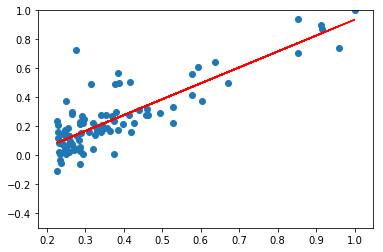

In [6]:
y_predict = theta[0] + theta[1] * sf_vector_x
y_predict.reshape(97)
plt.scatter(sf_vector_x, sf_vector_y)
plt.plot(sf_vector_x.reshape(97), y_predict.reshape(97), color='red', markersize=20)
ax = plt.gca()
ax.set_ylim([-0.5, 1])

In [7]:
# Graficamos la función de costo
cost_function = []
for i in range(0, sf_vector_x.size):
    cost_function.append((1/(2 * sf_vector_x[0][i])) * np.sum(np.power((theta[0] + theta[1]*sf_vector_x[0][i]) - sf_vector_y[0][i], 2)))
cost_function = np.array(cost_function)

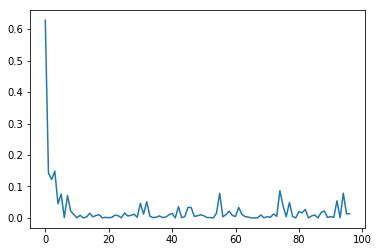

In [8]:
plt.plot(cost_function)

# 2 - con normalización media, sería a ser xi = (xi - promedio (característica)) / (max (característica) - min(característica))

In [9]:
# sin normalización media

vector_x = x.reshape(1, 97)
vector_y = y.reshape(1, 97)

max_vector_x = vector_x.max()
max_vector_y = vector_y.max()

min_vector_x = vector_x.min()
min_vector_y = vector_y.min()

divendo_x = max_vector_x - min_vector_x
divendo_y = max_vector_y - min_vector_y

sf_vector_x = vector_x - (np.sum(vector_x)/vector_x.size)/ divendo_x
sf_vector_y = vector_y - (np.sum(vector_y)/vector_y.size)/ divendo_y

In [10]:
theta = np.zeros((2, 1))
iterators = 10000
alpha = 0.01
temp_theta_1 = 0
temp_theta_2 = 0

theta_value_intercept = []
theta_value_slope = []
cost_function_j = []

for i in range(0, iterators):
    temp_theta_1 = theta[0] - (1/sf_vector_x.size)*alpha * np.sum((theta[0] + theta[1]*sf_vector_x) - sf_vector_y)
    temp_theta_2 = theta[1] - (1/sf_vector_x.size)*alpha * np.sum(((theta[0] + theta[1]*sf_vector_x) - sf_vector_y)*sf_vector_x)
       
    #actualizamos theta
    theta[0] = temp_theta_1
    theta[1] = temp_theta_2
    
    theta_value_intercept.append(temp_theta_1)
    theta_value_slope.append(temp_theta_2)
    cost_function_j.append((1/(2 * sf_vector_x.size)) * np.sum(np.power((theta[0] + theta[1]*sf_vector_x) - sf_vector_y, 2)))
    
print('Slope is ' + str(theta[1]))
print('Y intercept is ' + str(theta[0]))

Slope is [1.19303364]
Y intercept is [-3.54666305]


In [11]:
J = (1/(2 * sf_vector_x.size)) * np.sum(np.power((theta[0] + theta[1]*sf_vector_x) - sf_vector_y, 2))
J

4.476971375975179

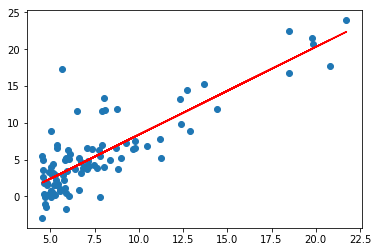

In [12]:
y_predict = theta[0] + theta[1] * sf_vector_x
y_predict.reshape(97)
plt.scatter(sf_vector_x, sf_vector_y)
plt.plot(sf_vector_x.reshape(97), y_predict.reshape(97), color='red')

In [13]:
# Graficamos la función de costo
cost_function = []
for i in range(0, sf_vector_x.size):
    cost_function.append((1/(2 * sf_vector_x[0][i])) * np.sum(np.power((theta[0] + theta[1]*sf_vector_x[0][i]) - sf_vector_y[0][i], 2)))
cost_function = np.array(cost_function)

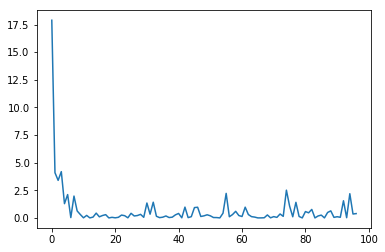

In [14]:
plt.plot(cost_function)

# Sin implementar escalamiento de características

In [16]:
#df = pd.read_csv('C:/Users/JERAZO/Documents/ex1data1.txt', header=None, names=['x','y']) # for windows
df = pd.read_csv('/home/jose/MLCourse/datasets/ex1data1.txt', header=None, names=['x','y']) # for ubuntu
x = df['x'].values
y = df['y'].values

theta = np.zeros((2, 1))
iterators = 11000
alpha = 0.01
temp_theta_1 = 0
temp_theta_2 = 0

for i in range(0, iterators):
    temp_theta_1 = theta[0] - (1/df['x'].size)*alpha * np.sum((theta[0] + theta[1]*x) - y)
    temp_theta_2 = theta[1] - (1/df['x'].size)*alpha * np.sum(((theta[0] + theta[1]*x) - y)*x)
    
    theta[0] = temp_theta_1
    theta[1] = temp_theta_2
    
print('Slope is ' + str(theta[1]))
print('Y intercept is ' + str(theta[0]))

Slope is [1.19303364]
Y intercept is [-3.89578087]


In [17]:
J = (1/(2 * df['x'].size)) * np.sum(np.power((theta[0] + theta[1]*x) - y, 2))
J

4.476971375975179

# Regresión lineal múltiple

In [19]:
# for import datasets
from sklearn import datasets
data = datasets.load_boston() #load boston dataset
dataBoston = pd.DataFrame(data.data, columns=data.feature_names)
target = pd.DataFrame(data.target, columns=["MEDV"])

In [20]:
import statsmodels.api as sm
X = dataBoston["RM"]
y = target["MEDV"]

#Note the difference in argument model
model = sm.OLS(y, X).fit()
predictions = mode.predict(X) #Mak<e the predictions by the model

# print out the statistics
model.summary()

/home/jose/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


ImportError: cannot import name 'factorial' from 'scipy.misc' (/home/jose/anaconda3/lib/python3.7/site-packages/scipy/misc/__init__.py)

In [21]:
from sklearn import linear_model
from sklearn import datasets # for import datasets

data = datasets.load_boston() #load boston dataset
dataBoston = pd.DataFrame(data.data, columns=data.feature_names)
target = pd.DataFrame(data.target, columns=["MEDV"])

X = dataBoston
y = target["MEDV"]

lm = linear_model.LinearRegression()
model = lm.fit(X,y)
predictions = lm.predict(X)
lm.score(X,y)
print('The coeficients are: ', lm.coef_)
print('The intercept is: ', lm.intercept_)

The coeficients are:  [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
The intercept is:  36.45948838509045


# 1 - Sin escalamiento de caracteristicas

In [22]:
dataBoston.columns #show the columns
dataBoston.shape #show the form

(506, 13)

In [23]:
x = dataBoston.values
y = target.values

theta = np.zeros((dataBoston.shape[1] + 1, 1))
iterators = 1000
alpha = 0.0000004
temp_theta_1 = 0
temp_theta_2 = 0
t = []

for i in range(0, iterators):

    for j in range(0, dataBoston.shape[0]):
        t.append(np.sum([theta[1] * x[j,0], 
                 theta[2] * x[j,1], 
                 theta[3] * x[j,2], 
                 theta[4] * x[j,3], 
                 theta[5] * x[j,4], 
                 theta[6] * x[j,5], 
                 theta[7] * x[j,6], 
                 theta[8] * x[j,7], 
                 theta[9] * x[j,8], 
                 theta[10] * x[j,9],
                 theta[11] * x[j,10],
                 theta[12] * x[j,11],
                 theta[13] * x[j,12]]))
                 
    s = np.array(t).reshape(506,1)

    temp_theta_1 = theta[0] - (1/dataBoston.shape[0])*alpha * np.sum((theta[0] + s) - y)
    temp_theta_2 = theta[1] - (1/dataBoston.shape[0])*alpha * np.sum(((theta[0] + s) - y)*x[:,0].reshape(506, 1))
    temp_theta_3 = theta[2] - (1/dataBoston.shape[0])*alpha * np.sum(((theta[0] + s) - y)*x[:,1].reshape(506, 1))
    temp_theta_4 = theta[3] - (1/dataBoston.shape[0])*alpha * np.sum(((theta[0] + s) - y)*x[:,2].reshape(506, 1))
    temp_theta_5 = theta[4] - (1/dataBoston.shape[0])*alpha * np.sum(((theta[0] + s) - y)*x[:,3].reshape(506, 1))
    temp_theta_6 = theta[5] - (1/dataBoston.shape[0])*alpha * np.sum(((theta[0] + s) - y)*x[:,4].reshape(506, 1))
    temp_theta_7 = theta[6] - (1/dataBoston.shape[0])*alpha * np.sum(((theta[0] + s) - y)*x[:,5].reshape(506, 1))
    temp_theta_8 = theta[7] - (1/dataBoston.shape[0])*alpha * np.sum(((theta[0] + s) - y)*x[:,6].reshape(506, 1))
    temp_theta_9 = theta[8] - (1/dataBoston.shape[0])*alpha * np.sum(((theta[0] + s) - y)*x[:,7].reshape(506, 1))
    temp_theta_10 = theta[9] - (1/dataBoston.shape[0])*alpha * np.sum(((theta[0] + s) - y)*x[:,8].reshape(506, 1))
    temp_theta_11 = theta[10] - (1/dataBoston.shape[0])*alpha * np.sum(((theta[0] + s) - y)*x[:,9].reshape(506, 1))
    temp_theta_12 = theta[11] - (1/dataBoston.shape[0])*alpha * np.sum(((theta[0] + s) - y)*x[:,10].reshape(506, 1))
    temp_theta_13 = theta[12] - (1/dataBoston.shape[0])*alpha * np.sum(((theta[0] + s) - y)*x[:,11].reshape(506, 1))
    temp_theta_14 = theta[13] - (1/dataBoston.shape[0])*alpha * np.sum(((theta[0] + s) - y)*x[:,12].reshape(506, 1))

    theta[0] = temp_theta_1
    theta[1] = temp_theta_2
    theta[2] = temp_theta_3
    theta[3] = temp_theta_4
    theta[4] = temp_theta_5
    theta[5] = temp_theta_6
    theta[6] = temp_theta_7
    theta[7] = temp_theta_8
    theta[8] = temp_theta_9
    theta[9] = temp_theta_10
    theta[10] = temp_theta_11
    theta[11] = temp_theta_12
    theta[12] = temp_theta_13
    theta[13] = temp_theta_14
    
    t.clear()

print('intercept is (theta_0)' + str(theta[0]))
print('The Slope is (theta_1)' + str(theta[1]))
print('The Slope is (theta_2)' + str(theta[2]))
print('The Slope is (theta_3)' + str(theta[3]))
print('The Slope is (theta_4)' + str(theta[4]))
print('The Slope is (theta_5)' + str(theta[5]))
print('The Slope is (theta_6)' + str(theta[6]))
print('The Slope is (theta_7)' + str(theta[7]))
print('The Slope is (theta_8)' + str(theta[8]))
print('The Slope is (theta_9)' + str(theta[9]))
print('The Slope is (theta_10)' + str(theta[10]))
print('The Slope is (theta_11)' + str(theta[11]))
print('The Slope is (theta_12)' + str(theta[12]))
print('The Slope is (theta_13)' + str(theta[13]))


intercept is (theta_0)[0.00037695]
The Slope is (theta_1)[-0.00450809]
The Slope is (theta_2)[0.02486327]
The Slope is (theta_3)[-0.00319939]
The Slope is (theta_4)[0.0001658]
The Slope is (theta_5)[0.00011401]
The Slope is (theta_6)[0.00397541]
The Slope is (theta_7)[0.00235446]
The Slope is (theta_8)[0.00209448]
The Slope is (theta_9)[-0.00141023]
The Slope is (theta_10)[-0.00023739]
The Slope is (theta_11)[0.00367669]
The Slope is (theta_12)[0.0605809]
The Slope is (theta_13)[-0.00933726]


In [24]:
for i in range(0, dataBoston.shape[0]):
    
    s = np.sum([theta[1] * x[j,0], 
                 theta[2] * x[j,1],
                 theta[3] * x[j,2],
                 theta[4] * x[j,3], 
                 theta[5] * x[j,4], 
                 theta[6] * x[j,5], 
                 theta[7] * x[j,6], 
                 theta[8] * x[j,7], 
                 theta[9] * x[j,8], 
                 theta[10] * x[j,9], 
                 theta[11] * x[j,10],
                 theta[12] * x[j,11],
                 theta[13] * x[j,12]])
    
    J = (1/(2 * dataBoston.shape[0])) * np.sum(np.power((theta[0] + s) - y[j], 2))
J

0.14860992277236637

In [25]:
#Con valores que nos dio las funciones slope e intercept

for j in range(0, dataBoston.shape[0]):
    
    s = np.sum([ -1.08011358e-01 * x[j,0], 
                 4.64204584e-02 * x[j,1],
                 2.05586264e-02 * x[j,2],
                 2.68673382e+00 * x[j,3], 
                 -1.77666112e+01 * x[j,4], 
                 3.80986521e+00 * x[j,5], 
                 6.92224640e-04 * x[j,6], 
                 -1.47556685e+00 * x[j,7], 
                 3.06049479e-01 * x[j,8], 
                 -1.23345939e-02 * x[j,9], 
                 -9.52747232e-01 * x[j,10],
                 9.31168327e-03 * x[j,11],
                 -5.24758378e-01 * x[j,12]])
    
    J = (1/(2 * dataBoston.shape[0])) * np.sum(np.power((36.45948838509045 + s) - y[j], 2))
J

0.1077881134864717

# 2 - Sin normalización media, con xi = xi/max

In [26]:
vector_x_CRIM = x[:,0].reshape(1, 506)
vector_x_ZN = x[:,1].reshape(1, 506)
vector_x_INDUS = x[:,2].reshape(1, 506)
vector_x_CHAS = x[:,3].reshape(1, 506)
vector_x_NOX = x[:,4].reshape(1, 506)
vector_x_RM = x[:,5].reshape(1, 506)
vector_x_AGE = x[:,6].reshape(1, 506)
vector_x_DIS = x[:,7].reshape(1, 506)
vector_x_RAD = x[:,8].reshape(1, 506)
vector_x_TAX = x[:,9].reshape(1, 506)
vector_x_PTRATIO = x[:,10].reshape(1, 506)
vector_x_B = x[:,11].reshape(1, 506)
vector_x_LSTAT = x[:,12].reshape(1, 506)
vector_y = y.reshape(1, 506)

max_vector_x_CRIM = vector_x_CRIM.max()
max_vector_x_ZN = vector_x_ZN.max()
max_vector_x_INDUS = vector_x_INDUS.max()
max_vector_x_CHAS = vector_x_CHAS.max()
max_vector_x_NOX = vector_x_NOX.max()
max_vector_x_RM = vector_x_RM.max()
max_vector_x_AGE = vector_x_AGE.max()
max_vector_x_DIS = vector_x_DIS.max()
max_vector_x_RAD = vector_x_RAD.max()
max_vector_x_TAX = vector_x_TAX.max()
max_vector_x_PTRATIO = vector_x_PTRATIO.max()
max_vector_x_B = vector_x_B.max()
max_vector_x_LSTAT = vector_x_LSTAT.max()
max_vector_y = vector_y.max()

max_values = np.array([max_vector_x_CRIM, max_vector_x_ZN, max_vector_x_INDUS, max_vector_x_CHAS, max_vector_x_NOX, max_vector_x_RM, max_vector_x_AGE, max_vector_x_DIS, max_vector_x_RAD, max_vector_x_TAX, max_vector_x_PTRATIO, max_vector_x_B, max_vector_x_LSTAT])
sf_vector_y = vector_y/max_vector_y

In [27]:
x = dataBoston.values
y = target.values

theta = np.zeros((dataBoston.shape[1] + 1, 1))
iterators = 1000
alpha = 0.0002
temp_theta_1 = 0
temp_theta_2 = 0
t = []

for i in range(0, iterators):

    for j in range(0, dataBoston.shape[0]):
        t.append(np.sum([theta[1] * x[j,0]/max_values[0], 
                 theta[2] * x[j,1]/max_values[1], 
                 theta[3] * x[j,2]/max_values[2], 
                 theta[4] * x[j,3]/max_values[3], 
                 theta[5] * x[j,4]/max_values[4], 
                 theta[6] * x[j,5]/max_values[5], 
                 theta[7] * x[j,6]/max_values[6], 
                 theta[8] * x[j,7]/max_values[7], 
                 theta[9] * x[j,8]/max_values[8], 
                 theta[10] * x[j,9]/max_values[9],
                 theta[11] * x[j,10]/max_values[10],
                 theta[12] * x[j,11]/max_values[11],
                 theta[13] * x[j,12]/max_values[12]]))
        
        #t.append(np.sum(np.transpose(theta[1:14]) * (x[j]/max_values)))
    s = np.array(t).reshape(506,1)
    
    temp_theta_1 = theta[0] - (1/dataBoston.shape[0])*alpha * np.sum((theta[0] + s)[0] - sf_vector_y)
    temp_theta_2 = theta[1] - (1/dataBoston.shape[0])*alpha * np.sum(((theta[0] + s)[0] - sf_vector_y)*x[:,0].reshape(506, 1)/max_values[0])
    temp_theta_3 = theta[2] - (1/dataBoston.shape[0])*alpha * np.sum(((theta[0] + s)[0] - sf_vector_y)*x[:,1].reshape(506, 1)/max_values[1])
    temp_theta_4 = theta[3] - (1/dataBoston.shape[0])*alpha * np.sum(((theta[0] + s)[0] - sf_vector_y)*x[:,2].reshape(506, 1)/max_values[2])
    temp_theta_5 = theta[4] - (1/dataBoston.shape[0])*alpha * np.sum(((theta[0] + s)[0] - sf_vector_y)*x[:,3].reshape(506, 1)/max_values[3])
    temp_theta_6 = theta[5] - (1/dataBoston.shape[0])*alpha * np.sum(((theta[0] + s)[0] - sf_vector_y)*x[:,4].reshape(506, 1)/max_values[4])
    temp_theta_7 = theta[6] - (1/dataBoston.shape[0])*alpha * np.sum(((theta[0] + s)[0] - sf_vector_y)*x[:,5].reshape(506, 1)/max_values[5])
    temp_theta_8 = theta[7] - (1/dataBoston.shape[0])*alpha * np.sum(((theta[0] + s)[0] - sf_vector_y)*x[:,6].reshape(506, 1)/max_values[6])
    temp_theta_9 = theta[8] - (1/dataBoston.shape[0])*alpha * np.sum(((theta[0] + s)[0] - sf_vector_y)*x[:,7].reshape(506, 1)/max_values[7])
    temp_theta_10 = theta[9] - (1/dataBoston.shape[0])*alpha * np.sum(((theta[0] + s)[0] - sf_vector_y)*x[:,8].reshape(506, 1)/max_values[8])
    temp_theta_11 = theta[10] - (1/dataBoston.shape[0])*alpha * np.sum(((theta[0] + s)[0] - sf_vector_y)*x[:,9].reshape(506, 1)/max_values[9])
    temp_theta_12 = theta[11] - (1/dataBoston.shape[0])*alpha * np.sum(((theta[0] + s)[0] - sf_vector_y)*x[:,10].reshape(506, 1)/max_values[10])
    temp_theta_13 = theta[12] - (1/dataBoston.shape[0])*alpha * np.sum(((theta[0] + s)[0] - sf_vector_y)*x[:,11].reshape(506, 1)/max_values[11])
    temp_theta_14 = theta[13] - (1/dataBoston.shape[0])*alpha * np.sum(((theta[0] + s)[0] - sf_vector_y)*x[:,12].reshape(506, 1)/max_values[12])

    theta[0] = temp_theta_1
    theta[1] = temp_theta_2
    theta[2] = temp_theta_3
    theta[3] = temp_theta_4
    theta[4] = temp_theta_5
    theta[5] = temp_theta_6
    theta[6] = temp_theta_7
    theta[7] = temp_theta_8
    theta[8] = temp_theta_9
    theta[9] = temp_theta_10
    theta[10] = temp_theta_11
    theta[11] = temp_theta_12
    theta[12] = temp_theta_13
    theta[13] = temp_theta_14
    
    t.clear()

print('intercept is (theta_0)' + str(theta[0]))
print('The Slope is (theta_1)' + str(theta[1]))
print('The Slope is (theta_2)' + str(theta[2]))
print('The Slope is (theta_3)' + str(theta[3]))
print('The Slope is (theta_4)' + str(theta[4]))
print('The Slope is (theta_5)' + str(theta[5]))
print('The Slope is (theta_6)' + str(theta[6]))
print('The Slope is (theta_7)' + str(theta[7]))
print('The Slope is (theta_8)' + str(theta[8]))
print('The Slope is (theta_9)' + str(theta[9]))
print('The Slope is (theta_10)' + str(theta[10]))
print('The Slope is (theta_11)' + str(theta[11]))
print('The Slope is (theta_12)' + str(theta[12]))
print('The Slope is (theta_13)' + str(theta[13]))

intercept is (theta_0)[0.00026832]
The Slope is (theta_1)[0.00551386]
The Slope is (theta_2)[0.01542822]
The Slope is (theta_3)[0.05450691]
The Slope is (theta_4)[0.00939109]
The Slope is (theta_5)[0.08646385]
The Slope is (theta_6)[0.09718157]
The Slope is (theta_7)[0.09310299]
The Slope is (theta_8)[0.0424893]
The Slope is (theta_9)[0.05402112]
The Slope is (theta_10)[0.07795453]
The Slope is (theta_11)[0.11389439]
The Slope is (theta_12)[0.12200814]
The Slope is (theta_13)[0.04524322]


In [28]:
for j in range(0, dataBoston.shape[0]):
    
    s = np.sum([theta[1] * x[j,0]/max_values[0], 
                 theta[2] * x[j,1]/max_values[1],
                 theta[3] * x[j,2]/max_values[2],
                 theta[4] * x[j,3]/max_values[3], 
                 theta[5] * x[j,4]/max_values[4], 
                 theta[6] * x[j,5]/max_values[5], 
                 theta[7] * x[j,6]/max_values[6], 
                 theta[8] * x[j,7]/max_values[7], 
                 theta[9] * x[j,8]/max_values[8], 
                 theta[10] * x[j,9]/max_values[9], 
                 theta[11] * x[j,10]/max_values[10],
                 theta[12] * x[j,11]/max_values[11],
                 theta[13] * x[j,12]/max_values[12]])
    
    J = (1/(2 * dataBoston.shape[0])) * np.sum(np.power((theta[0] + s) - y[j]/y.max(), 2))
    
J

6.972760043742801e-05

# 3 - con normalización media, sería a ser xi = (xi - promedio (característica)) / (max (característica) - min(característica))

In [29]:
vector_x_CRIM = x[:,0].reshape(1, 506)
vector_x_ZN = x[:,1].reshape(1, 506)
vector_x_INDUS = x[:,2].reshape(1, 506)
vector_x_CHAS = x[:,3].reshape(1, 506)
vector_x_NOX = x[:,4].reshape(1, 506)
vector_x_RM = x[:,5].reshape(1, 506)
vector_x_AGE = x[:,6].reshape(1, 506)
vector_x_DIS = x[:,7].reshape(1, 506)
vector_x_RAD = x[:,8].reshape(1, 506)
vector_x_TAX = x[:,9].reshape(1, 506)
vector_x_PTRATIO = x[:,10].reshape(1, 506)
vector_x_B = x[:,11].reshape(1, 506)
vector_x_LSTAT = x[:,12].reshape(1, 506)
vector_y = y.reshape(1, 506)

max_vector_x_CRIM = vector_x_CRIM.max()
max_vector_x_ZN = vector_x_ZN.max()
max_vector_x_INDUS = vector_x_INDUS.max()
max_vector_x_CHAS = vector_x_CHAS.max()
max_vector_x_NOX = vector_x_NOX.max()
max_vector_x_RM = vector_x_RM.max()
max_vector_x_AGE = vector_x_AGE.max()
max_vector_x_DIS = vector_x_DIS.max()
max_vector_x_RAD = vector_x_RAD.max()
max_vector_x_TAX = vector_x_TAX.max()
max_vector_x_PTRATIO = vector_x_PTRATIO.max()
max_vector_x_B = vector_x_B.max()
max_vector_x_LSTAT = vector_x_LSTAT.max()
max_vector_y = vector_y.max()

max_values = np.array([max_vector_x_CRIM, max_vector_x_ZN, max_vector_x_INDUS, max_vector_x_CHAS, max_vector_x_NOX, max_vector_x_RM, max_vector_x_AGE, max_vector_x_DIS, max_vector_x_RAD, max_vector_x_TAX, max_vector_x_PTRATIO, max_vector_x_B, max_vector_x_LSTAT])
sf_vector_y = (vector_y - np.average(vector_y)) / (max_vector_y - np.min(vector_y))

In [30]:
x = dataBoston.values
y = target.values

theta = np.zeros((dataBoston.shape[1] + 1, 1))
iterators = 200
alpha = 0.0002
temp_theta_1 = 0
temp_theta_2 = 0
t = []

for i in range(0, iterators):

    for j in range(0, dataBoston.shape[0]):
        t.append(np.sum([theta[1] * ((x[j,0] - np.average(x[:,0]))/(max_values[0] - np.min(x[:,0]))), 
                 theta[2] * ((x[j,1] - np.average(x[:,1]))/(max_values[1] - np.min(x[:,1]))), 
                 theta[3] * ((x[j,2] - np.average(x[:,2]))/(max_values[2] - np.min(x[:,2]))), 
                 theta[4] * ((x[j,3] - np.average(x[:,3]))/(max_values[3] - np.min(x[:,3]))), 
                 theta[5] * ((x[j,4] - np.average(x[:,4]))/(max_values[4] - np.min(x[:,4]))), 
                 theta[6] * ((x[j,5] - np.average(x[:,5]))/(max_values[5] - np.min(x[:,5]))), 
                 theta[7] * ((x[j,6] - np.average(x[:,6]))/(max_values[6] - np.min(x[:,6]))), 
                 theta[8] * ((x[j,7] - np.average(x[:,7]))/(max_values[7] - np.min(x[:,7]))), 
                 theta[9] * ((x[j,8] - np.average(x[:,8]))/(max_values[8] - np.min(x[:,8]))), 
                 theta[10] * ((x[j,9] - np.average(x[:,9]))/(max_values[9] - np.min(x[:,9]))),
                 theta[11] * ((x[j,10] - np.average(x[:,10]))/(max_values[10] - np.min(x[:,10]))),
                 theta[12] * ((x[j,11] - np.average(x[:,11]))/(max_values[11] - np.min(x[:,11]))),
                 theta[13] * ((x[j,12] - np.average(x[:,12]))/(max_values[12] - np.min(x[:,12])))]))
        
        #t.append(np.sum(np.transpose(theta[1:14]) * (x[j]/max_values)))
    s = np.array(t).reshape(506,1)
    
    temp_theta_1 = theta[0] - (1/dataBoston.shape[0])*alpha * np.sum((theta[0] + s)[0] - sf_vector_y)
    temp_theta_2 = theta[1] - (1/dataBoston.shape[0])*alpha * np.sum(((theta[0] + s)[0] - sf_vector_y)*x[:,0].reshape(506, 1)/max_values[0])
    temp_theta_3 = theta[2] - (1/dataBoston.shape[0])*alpha * np.sum(((theta[0] + s)[0] - sf_vector_y)*x[:,1].reshape(506, 1)/max_values[1])
    temp_theta_4 = theta[3] - (1/dataBoston.shape[0])*alpha * np.sum(((theta[0] + s)[0] - sf_vector_y)*x[:,2].reshape(506, 1)/max_values[2])
    temp_theta_5 = theta[4] - (1/dataBoston.shape[0])*alpha * np.sum(((theta[0] + s)[0] - sf_vector_y)*x[:,3].reshape(506, 1)/max_values[3])
    temp_theta_6 = theta[5] - (1/dataBoston.shape[0])*alpha * np.sum(((theta[0] + s)[0] - sf_vector_y)*x[:,4].reshape(506, 1)/max_values[4])
    temp_theta_7 = theta[6] - (1/dataBoston.shape[0])*alpha * np.sum(((theta[0] + s)[0] - sf_vector_y)*x[:,5].reshape(506, 1)/max_values[5])
    temp_theta_8 = theta[7] - (1/dataBoston.shape[0])*alpha * np.sum(((theta[0] + s)[0] - sf_vector_y)*x[:,6].reshape(506, 1)/max_values[6])
    temp_theta_9 = theta[8] - (1/dataBoston.shape[0])*alpha * np.sum(((theta[0] + s)[0] - sf_vector_y)*x[:,7].reshape(506, 1)/max_values[7])
    temp_theta_10 = theta[9] - (1/dataBoston.shape[0])*alpha * np.sum(((theta[0] + s)[0] - sf_vector_y)*x[:,8].reshape(506, 1)/max_values[8])
    temp_theta_11 = theta[10] - (1/dataBoston.shape[0])*alpha * np.sum(((theta[0] + s)[0] - sf_vector_y)*x[:,9].reshape(506, 1)/max_values[9])
    temp_theta_12 = theta[11] - (1/dataBoston.shape[0])*alpha * np.sum(((theta[0] + s)[0] - sf_vector_y)*x[:,10].reshape(506, 1)/max_values[10])
    temp_theta_13 = theta[12] - (1/dataBoston.shape[0])*alpha * np.sum(((theta[0] + s)[0] - sf_vector_y)*x[:,11].reshape(506, 1)/max_values[11])
    temp_theta_14 = theta[13] - (1/dataBoston.shape[0])*alpha * np.sum(((theta[0] + s)[0] - sf_vector_y)*x[:,12].reshape(506, 1)/max_values[12])

    theta[0] = temp_theta_1
    theta[1] = temp_theta_2
    theta[2] = temp_theta_3
    theta[3] = temp_theta_4
    theta[4] = temp_theta_5
    theta[5] = temp_theta_6
    theta[6] = temp_theta_7
    theta[7] = temp_theta_8
    theta[8] = temp_theta_9
    theta[9] = temp_theta_10
    theta[10] = temp_theta_11
    theta[11] = temp_theta_12
    theta[12] = temp_theta_13
    theta[13] = temp_theta_14
    
    t.clear()

print('intercept is (theta_0)' + str(theta[0]))
print('The Slope is (theta_1)' + str(theta[1]))
print('The Slope is (theta_2)' + str(theta[2]))
print('The Slope is (theta_3)' + str(theta[3]))
print('The Slope is (theta_4)' + str(theta[4]))
print('The Slope is (theta_5)' + str(theta[5]))
print('The Slope is (theta_6)' + str(theta[6]))
print('The Slope is (theta_7)' + str(theta[7]))
print('The Slope is (theta_8)' + str(theta[8]))
print('The Slope is (theta_9)' + str(theta[9]))
print('The Slope is (theta_10)' + str(theta[10]))
print('The Slope is (theta_11)' + str(theta[11]))
print('The Slope is (theta_12)' + str(theta[12]))
print('The Slope is (theta_13)' + str(theta[13]))

intercept is (theta_0)[-1.26558225e-13]
The Slope is (theta_1)[-2.60074566e-12]
The Slope is (theta_2)[-7.2770971e-12]
The Slope is (theta_3)[-2.57095203e-11]
The Slope is (theta_4)[-4.42953735e-12]
The Slope is (theta_5)[-4.07827938e-11]
The Slope is (theta_6)[-4.58380713e-11]
The Slope is (theta_7)[-4.3914306e-11]
The Slope is (theta_8)[-2.00411219e-11]
The Slope is (theta_9)[-2.54803858e-11]
The Slope is (theta_10)[-3.67691645e-11]
The Slope is (theta_11)[-5.37210827e-11]
The Slope is (theta_12)[-5.75481308e-11]
The Slope is (theta_13)[-2.13400738e-11]


In [31]:
for j in range(0, dataBoston.shape[0]):
    
    s = np.sum([theta[1] * ((x[j,0] - np.average(x[:,0]))/(max_values[0] - np.min(x[:,0]))), 
                 theta[2] * ((x[j,1] - np.average(x[:,1]))/(max_values[1] - np.min(x[:,1]))), 
                 theta[3] * ((x[j,2] - np.average(x[:,2]))/(max_values[2] - np.min(x[:,2]))), 
                 theta[4] * ((x[j,3] - np.average(x[:,3]))/(max_values[3] - np.min(x[:,3]))), 
                 theta[5] * ((x[j,4] - np.average(x[:,4]))/(max_values[4] - np.min(x[:,4]))), 
                 theta[6] * ((x[j,5] - np.average(x[:,5]))/(max_values[5] - np.min(x[:,5]))), 
                 theta[7] * ((x[j,6] - np.average(x[:,6]))/(max_values[6] - np.min(x[:,6]))), 
                 theta[8] * ((x[j,7] - np.average(x[:,7]))/(max_values[7] - np.min(x[:,7]))), 
                 theta[9] * ((x[j,8] - np.average(x[:,8]))/(max_values[8] - np.min(x[:,8]))), 
                 theta[10] * ((x[j,9] - np.average(x[:,9]))/(max_values[9] - np.min(x[:,9]))),
                 theta[11] * ((x[j,10] - np.average(x[:,10]))/(max_values[10] - np.min(x[:,10]))),
                 theta[12] * ((x[j,11] - np.average(x[:,11]))/(max_values[11] - np.min(x[:,11]))),
                 theta[13] * ((x[j,12] - np.average(x[:,12]))/(max_values[12] - np.min(x[:,12])))])
    
    J = (1/(2 * dataBoston.shape[0])) * np.sum(np.power((theta[0] + s) - (y[j] - np.average(y))/(y.max() - y.min()), 2))
    
J

5.5168384485120646e-05

In [102]:
dataset = np.copy(dataBoston)
x
y

import numpy as np

col = np.ones((dataBoston.shape[0], 1))
dataset_x =  np.copy(x)
target = np.hstack((dataset_x[:,:0], col, dataset_x[:,0:]))
target

# (X'X)^-1
theta_normalEquation = np.transpose(target).dot(target)
theta_normalEquation.shape
invMatrix = np.linalg.inv(theta_normalEquation)
invMatrix

# (X'y)
multiply_Xt_y = np.transpose(target).dot(y)
multiply_Xt_y


#Se calcula los parámetros theta finales
normalEquation_computed = invMatrix.dot(multiply_Xt_y)
normalEquation_computed

"""
The coeficients are:  [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
The intercept is:  36.45948838509045
"""

array([[ 3.64594884e+01],
       [-1.08011358e-01],
       [ 4.64204584e-02],
       [ 2.05586264e-02],
       [ 2.68673382e+00],
       [-1.77666112e+01],
       [ 3.80986521e+00],
       [ 6.92224640e-04],
       [-1.47556685e+00],
       [ 3.06049479e-01],
       [-1.23345939e-02],
       [-9.52747232e-01],
       [ 9.31168327e-03],
       [-5.24758378e-01]])